In [2]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import tables
answersTable = pd.read_csv("r_answers.csv")
questionsTable = pd.read_csv("r_questions.csv")

C:\Users\baren\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#After some inspection I realised that the answers to a certain question (with id =95007) could be fetched like this:
answersTable.loc[answersTable[" ParentId"]==95007]

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,ParentId,CommentCount
9,95598,1179,2008-09-18T18:49:09.870,2008-09-18T18:49:09.870,5,95007,0
726,1463249,79513,2009-09-22T23:58:43.997,2009-09-23T14:44:04.720,54,95007,7


In [5]:
#The tables fetched by Dhruv are a bit weird, must columns have a white space at the beginning.
list(questionsTable.columns.values)

['Id',
 ' OwnerUserId',
 ' CreationDate',
 ' LastActivityDate',
 ' Score',
 ' AcceptedAnswerId',
 ' AnswerCount',
 ' CommentCount',
 ' ViewCount',
 ' FavoriteCount',
 'Unnamed: 10']

In [6]:
#Inspecting questions Table
questionsTable.head()

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,AcceptedAnswerId,AnswerCount,CommentCount,ViewCount,FavoriteCount,Unnamed: 10
0,77434,14008,2008-09-16T21:40:29.927,2017-06-17T22:25:14.770,194,0,11,3,196567,40,NaN
1,79709,0,2008-09-17T03:39:16.913,2016-04-28T13:21:33.607,5,0,7,2,830,3,NaN
2,95007,15842,2008-09-18T17:59:19.583,2009-09-23T14:44:04.720,60,1463249,2,0,25874,21,NaN
3,102056,0,2008-09-19T14:03:25.997,2014-07-10T18:16:29.313,121,0,21,2,11060,53,NaN
4,103312,0,2008-09-19T16:09:26.053,2015-04-23T05:16:26.967,5,0,2,0,3402,0,NaN


In [7]:
#Idea is : each time a user answers, update his score of accepted vs ansered questions

In [8]:
answersTable=answersTable.sort_values([' OwnerUserId',' CreationDate']) #order by user and then by creation date
questionsTable=questionsTable.sort_values([' OwnerUserId',' CreationDate']) #order by user and then by creation date

In [9]:
#Find answers that were accepted (note that this information is in questions table)
accepted=pd.match(answersTable["Id"].tolist(),questionsTable[' AcceptedAnswerId'])

C:\Users\baren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.match() is deprecated and will be removed in a future version
  


In [10]:
#Update answersTable with infor regarding whether answer was the accepted one or not.
answersTable["AcceptedAnswer"]=accepted
answersTable['AcceptedAnswer'] = np.where(answersTable['AcceptedAnswer'] == -1,0, answersTable['AcceptedAnswer'])
answersTable['AcceptedAnswer'] = np.where(answersTable['AcceptedAnswer'] != 0,1, answersTable['AcceptedAnswer'])
 

In [12]:
#Check that for a given question, the accepted answer is marked as accepted in answersTable.
answersTable.loc[answersTable[" ParentId"]==95007]

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,ParentId,CommentCount,AcceptedAnswer
9,95598,1179,2008-09-18T18:49:09.870,2008-09-18T18:49:09.870,5,95007,0,0
726,1463249,79513,2009-09-22T23:58:43.997,2009-09-23T14:44:04.720,54,95007,7,1


In [13]:
#Compute cumulative sum of accepted answers so far.
answersTable['CumSumAccepted'] = answersTable.groupby(' OwnerUserId')['AcceptedAnswer'].cumsum()

In [14]:
#Compute number of questions answered so far.
answersTable['CumSumQuestions'] = answersTable.groupby(' OwnerUserId').cumcount() + 1

In [15]:
#Compute prob of accepted answer
answersTable['ProbAccAnswer'] = answersTable['CumSumAccepted']/answersTable['CumSumQuestions']

In [18]:
#Checking that cumulative sums and prob is being correcly computed
answersTable.loc[answersTable[" OwnerUserId"]==0]

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,ParentId,CommentCount,AcceptedAnswer,CumSumAccepted,CumSumQuestions,ProbAccAnswer
3,79788,0,2008-09-17T03:51:30.190,2008-09-17T03:51:30.190,4,79709,0,0,0,1,0.000000
8,86804,0,2008-09-17T19:39:37.370,2008-09-17T19:39:37.370,1,79709,0,0,0,2,0.000000
41,476928,0,2009-01-25T00:05:19.107,2009-01-26T03:22:01.867,19,476726,0,0,0,3,0.000000
44,501926,0,2009-02-02T00:42:27.250,2009-02-02T00:42:27.250,6,501917,0,0,0,4,0.000000
62,612573,0,2009-03-04T21:41:41.980,2009-03-04T21:41:41.980,8,596819,1,0,0,5,0.000000
85,750852,0,2009-04-15T08:58:03.103,2009-04-15T09:14:06.747,-1,750786,1,0,0,6,0.000000
98,823251,0,2009-05-05T03:50:25.733,2009-05-05T03:50:25.733,8,750786,1,0,0,7,0.000000
104,876778,0,2009-05-18T08:56:02.270,2009-05-18T09:48:20.650,2,876711,0,0,0,8,0.000000
113,969680,0,2009-06-09T12:03:40.747,2013-06-08T13:44:20.033,114,750786,4,1,1,9,0.111111
135,1116218,0,2009-07-12T15:18:02.497,2009-07-12T18:40:27.267,4,1114699,1,0,1,10,0.100000


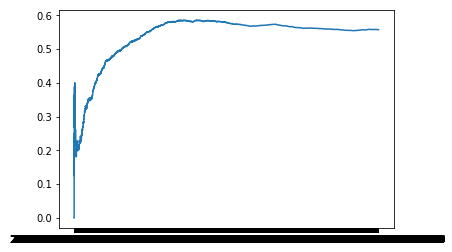

In [19]:
#Just take a look at user with the most answered questions
answersTable.loc[answersTable[ "CumSumQuestions"].idxmax()]
user = 3732271 
plt.figure()
plt.plot(answersTable.loc[answersTable[" OwnerUserId"]==user][" CreationDate"].tolist(),answersTable.loc[answersTable[" OwnerUserId"]==user]["ProbAccAnswer"].tolist())
plt.show()

In [21]:
#Normalization: 0 should correspond to time of first activity and 1 to present date. 
#1 converting creation date to proper time format
answersTable[' CreationDate']=pd.to_datetime(answersTable[' CreationDate'])
questionsTable[' CreationDate']=pd.to_datetime(questionsTable[' CreationDate'])


In [22]:
#2 create relativeTime
#2.1 identify the first activity of users
answersTable["FirstActivity"]=~answersTable[" OwnerUserId"].duplicated()
questionsTable["FirstActivity"]=~questionsTable[" OwnerUserId"].duplicated()
    
firstAnswers=answersTable.loc[answersTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]
firstQuestions = questionsTable.loc[questionsTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]

In [23]:
firstActTable=firstQuestions.merge(firstAnswers, left_on=" OwnerUserId", right_on=" OwnerUserId", how='outer')
firstActTable.columns = [" OwnerUserId","FirstQuestion","FirstAnswer"]

In [24]:
firstActTable["FirstActivity"]=firstActTable[["FirstQuestion","FirstAnswer"]].min(axis=1)

In [25]:
firstActTable #confirmed that is correct for userId 277 and 280

,OwnerUserId,FirstQuestion,FirstAnswer,FirstActivity
0,0,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913
1,277,2008-09-24 13:31:07.500,2011-01-18 17:53:30.627,2008-09-24 13:31:07.500
2,280,2009-12-11 01:18:47.903,NaT,2009-12-11 01:18:47.903
3,337,2014-10-16 17:33:39.987,2014-08-19 19:58:00.707,2014-08-19 19:58:00.707
4,357,2016-03-04 15:00:16.023,NaT,2016-03-04 15:00:16.023
5,404,2010-01-23 00:30:05.610,NaT,2010-01-23 00:30:05.610
6,422,2009-05-18 08:16:10.573,NaT,2009-05-18 08:16:10.573
7,445,2009-01-31 14:50:28.677,2009-02-04 15:12:59.503,2009-01-31 14:50:28.677
8,572,2009-01-07 13:27:28.407,NaT,2009-01-07 13:27:28.407
9,681,2012-04-06 21:21:34.377,2012-10-01 22:57:01.570,2012-04-06 21:21:34.377


In [264]:
#Adding first activity table to answerstable 
summaryTableProbAccAnswer = answersTable[["Id"," OwnerUserId"," CreationDate"," ParentId","ProbAccAnswer"]]
summaryTableProbAccAnswer=summaryTableProbAccAnswer.merge(firstActTable,left_on = " OwnerUserId",right_on=" OwnerUserId")

In [265]:
#Use first activity to obtain normalized time
summaryTableProbAccAnswer["Present"]= max(summaryTableProbAccAnswer[" CreationDate"])
summaryTableProbAccAnswer["DifferenceNumerator"]=(summaryTableProbAccAnswer[" CreationDate"]-summaryTableProbAccAnswer["FirstActivity"])
summaryTableProbAccAnswer["DifferenceDenominator"]=(summaryTableProbAccAnswer["Present"]-summaryTableProbAccAnswer["FirstActivity"])

In [266]:
summaryTableProbAccAnswer.DifferenceNumerator=summaryTableProbAccAnswer.DifferenceNumerator.dt.total_seconds() /(24*3600)
summaryTableProbAccAnswer.DifferenceDenominator=summaryTableProbAccAnswer.DifferenceDenominator.dt.total_seconds()/(24*3600)
summaryTableProbAccAnswer["NormTime"]=summaryTableProbAccAnswer["DifferenceNumerator"]/summaryTableProbAccAnswer["DifferenceDenominator"]

In [267]:
summaryTableProbAccAnswer

,Id,OwnerUserId,CreationDate,ParentId,ProbAccAnswer,FirstQuestion,FirstAnswer,FirstActivity,Present,DifferenceNumerator,DifferenceDenominator,NormTime
0,79788,0,2008-09-17 03:51:30.190,79709,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,0.008487,3462.026488,0.000002
1,86804,0,2008-09-17 19:39:37.370,79709,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,0.666903,3462.026488,0.000193
2,476928,0,2009-01-25 00:05:19.107,476726,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,129.851414,3462.026488,0.037507
3,501926,0,2009-02-02 00:42:27.250,501917,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,137.877203,3462.026488,0.039826
4,612573,0,2009-03-04 21:41:41.980,596819,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,168.751679,3462.026488,0.048744
5,750852,0,2009-04-15 08:58:03.103,750786,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,210.221368,3462.026488,0.060722
6,823251,0,2009-05-05 03:50:25.733,750786,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,230.007741,3462.026488,0.066437
7,876778,0,2009-05-18 08:56:02.270,876711,0.000000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,243.219969,3462.026488,0.070254
8,969680,0,2009-06-09 12:03:40.747,750786,0.111111,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,265.350276,3462.026488,0.076646
9,1116218,0,2009-07-12 15:18:02.497,1114699,0.100000,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,298.485250,3462.026488,0.086217


In [272]:
#Remove users who have less than 5 answers
nrQuestionsperUser = answersTable[" OwnerUserId"].value_counts()
#summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[""]]
lessthan5users=nrQuestionsperUser[nrQuestionsperUser<5].index
nrUsersBefore=len(list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist())))
summaryTableProbAccAnswer=summaryTableProbAccAnswer.loc[~summaryTableProbAccAnswer[" OwnerUserId"].isin(lessthan5users)]
nrUsersAfter=len(list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist())))
print(1-nrUsersAfter/nrUsersBefore,"% of the users were removed.")# 27339 users were removed, so only around 5000 users stay.

0.0 % of the users were removed.


In [273]:
#Add 0 to time 0 and prolong score to 1
usersWhoHaveZero=list(set(summaryTableProbAccAnswer[" OwnerUserId"][summaryTableProbAccAnswer["NormTime"]==0].tolist())) # around 3000
usersArtificialZero = list(set(summaryTableProbAccAnswer[" OwnerUserId"][~summaryTableProbAccAnswer[" OwnerUserId"].isin(usersWhoHaveZero)].tolist()))
tempdfArtificialZero = pd.DataFrame(0, index=np.arange(len(usersArtificialZero)), columns=list(summaryTableProbAccAnswer.columns.values))
tempdfArtificialZero[" OwnerUserId"]=usersArtificialZero
tempdfArtificialZero[" OwnerUserId"]=tempdfArtificialZero[" OwnerUserId"].astype(np.int64)
summaryTableProbAccAnswer = summaryTableProbAccAnswer.append(tempdfArtificialZero, ignore_index=True)

#reorder again
summaryTableProbAccAnswer=summaryTableProbAccAnswer.sort_values([' OwnerUserId','NormTime']) #order by user
summaryTableProbAccAnswer

,Id,OwnerUserId,CreationDate,ParentId,ProbAccAnswer,FirstQuestion,FirstAnswer,FirstActivity,Present,DifferenceNumerator,DifferenceDenominator,NormTime
252282,0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000
0,79788,0,2008-09-17 03:51:30.190000,79709,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,0.008487,3462.026488,0.000002
1,86804,0,2008-09-17 19:39:37.370000,79709,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,0.666903,3462.026488,0.000193
2,476928,0,2009-01-25 00:05:19.107000,476726,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,129.851414,3462.026488,0.037507
3,501926,0,2009-02-02 00:42:27.250000,501917,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,137.877203,3462.026488,0.039826
4,612573,0,2009-03-04 21:41:41.980000,596819,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,168.751679,3462.026488,0.048744
5,750852,0,2009-04-15 08:58:03.103000,750786,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,210.221368,3462.026488,0.060722
6,823251,0,2009-05-05 03:50:25.733000,750786,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,230.007741,3462.026488,0.066437
7,876778,0,2009-05-18 08:56:02.270000,876711,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,243.219969,3462.026488,0.070254
8,969680,0,2009-06-09 12:03:40.747000,750786,0.111111,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,265.350276,3462.026488,0.076646


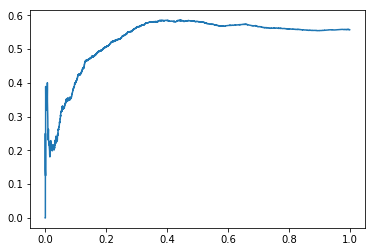

In [113]:
#Example - shape should be the same but with different x axis, between 0 and 1
user = 3732271
plt.figure()
plt.plot(summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["NormTime"].tolist(),summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["ProbAccAnswer"].tolist())
plt.show()

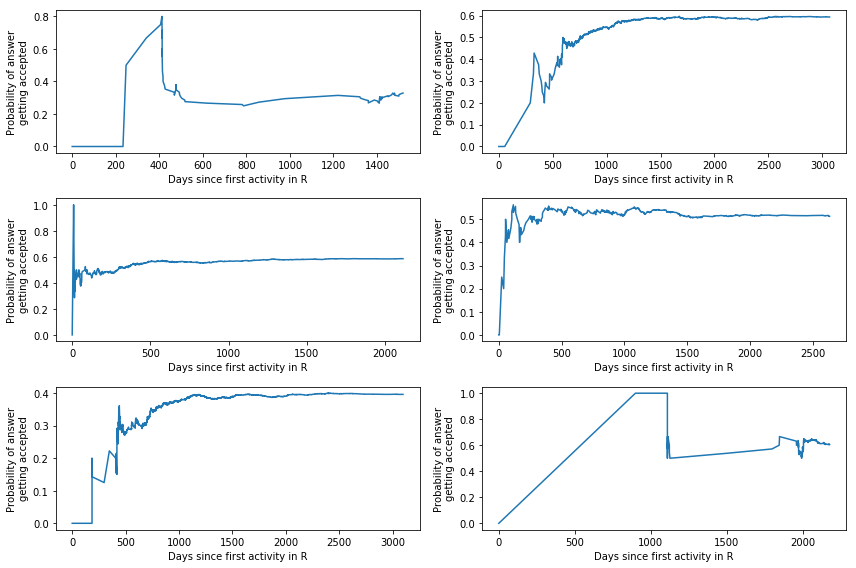

In [274]:
#Now  let's look at some random users - just to check that they have similar curves
import random
r_users=summaryTableProbAccAnswer.loc[np.random.choice(summaryTableProbAccAnswer.index, 6)][" OwnerUserId"].tolist()
plt.figure(figsize=(12,8))

for i in range(0,6):
    user=r_users[i]
    plt.subplot(3,2,i+1)
    plt.xlabel("Days since first activity in R")
    plt.ylabel("Probability of answer\ngetting accepted")
    plt.plot(summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["DifferenceNumerator"].tolist(),summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["ProbAccAnswer"].tolist())
    plt.tight_layout()

plt.show()

In [275]:
# Using all users - aggregate: some modules are needed for the interpolation
import numpy as np
from scipy.interpolate import interp1d

In [290]:
#possible timepoints from 0 to the maximum span.
x_all = np.linspace(0, max(summaryTableProbAccAnswer["DifferenceDenominator"]),num=5000, endpoint=True)
sumProbs = np.zeros(len(x_all))
nrUsers = np.zeros(len(x_all))
users = list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist()))
#total = np.empty((len(x_all),len(users),))
#total.fill(np.nan)
thresExpertise=0.3
consUsers=0
#for each user:
#linear interpolation - already checked that curve shape is similar to the ones obtained individually
for user in users:
    xs_user=summaryTableProbAccAnswer["DifferenceNumerator"][summaryTableProbAccAnswer[" OwnerUserId"]==user].tolist()
    probs_user= summaryTableProbAccAnswer["ProbAccAnswer"][summaryTableProbAccAnswer[" OwnerUserId"]==user].tolist()
    f1 = interp1d(xs_user,probs_user ,'linear')
    subset_x_all=x_all[x_all<max(xs_user)]
    f1_int = f1(subset_x_all)
    
    
    if (min(probs_user[-5:])>thresExpertise):
        consUsers=consUsers+1
        #total[0:len(subset_x_all),i]=f1_int
        #update probability sums at each time point with the interpolated probabilities for this user
        sumProbs[0:len(subset_x_all)]=sumProbs[0:len(subset_x_all)]+f1_int
        #update nr users 
        nrUsers[0:len(subset_x_all)] = nrUsers[0:len(subset_x_all)]+1
        

In [291]:
print((len(users)-consUsers)/len(users), " were not considered")

0.6879320560932254  were not considered


In [292]:
consUsers

1580

In [293]:
#Remove timepoints which have less than a threshold number of users
threshUsers=100
noUsersPos = np.where(nrUsers>threshUsers)
sumProbs=sumProbs[noUsersPos]
nrUsers=nrUsers[noUsersPos]
x_all=x_all[noUsersPos]
#total = total[noUsersPos,:]

In [294]:
len(x_all) #4968 goes to 3146

3146

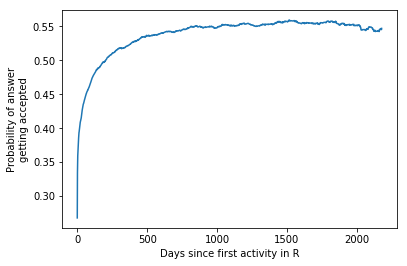

In [295]:
plt.figure()
plt.xlabel("Days since first activity in R")
plt.ylabel("Probability of answer\ngetting accepted")
plt.plot(x_all, sumProbs/nrUsers)
plt.show()

In [297]:
max(x_all)/365 #time range in the plot (years)

5.967261016591002